# Import packages and verify versions

In [1]:
import pandas as pd
import sklearn
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The pandas version is 0.21.0.
The scikit-learn version is 0.19.1.


# Load data

In [2]:
url_customers = 'https://raw.githubusercontent.com/hackerguy/IBM-ML/master/data/customers.csv'
url_transactions = 'https://raw.githubusercontent.com/hackerguy/IBM-ML/master/data/transactions.csv'

In [3]:
customers = pd.read_table(url_customers,sep=',')
transactions = pd.read_table(url_transactions,sep=',')

In [4]:
pd.set_option('display.max_columns', None)
customers.head()

,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange
0,787,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22
1,789,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22
2,1,NaN,No,No,Yes,No,Female,Widowed,No,Yes,Yes,17 to 22
3,2,NaN,No,Yes,No,No,Female,Separated,No,Yes,Yes,17 to 22
4,3,1.0,No,Yes,Yes,No,Male,Single,No,Yes,No,17 to 22


In [5]:
transactions.head()

,CustomerID,TimeYears,lasttrans,current,Frequency_score,Monetary_score,Churn
0,787,7,117.393407,1,1,55541,T
1,789,7,117.393407,1,six,1,T
2,1,6,137.165304,1,2,2,F
3,2,8,72.997904,1,1,3,F
4,3,13,105.156650,1,2,3,F


In [6]:
print('Number of rows in customers = {}'.format(customers.CustomerID.count()))
print('Number of rows in trips = {}'.format(transactions.CustomerID.count()))

Number of rows in customers = 788
Number of rows in trips = 788


# Join Data

In [7]:
joined = customers.join(transactions.set_index('CustomerID'), on='CustomerID', how='inner').reset_index(drop=True)

In [8]:
print('Number of rows in joined = {}'.format(joined.CustomerID.count()))
joined.head()

Number of rows in joined = 788


,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange,TimeYears,lasttrans,current,Frequency_score,Monetary_score,Churn
0,787,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22,7,117.393407,1,1,55541,T
1,789,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22,7,117.393407,1,six,1,T
2,1,NaN,No,No,Yes,No,Female,Widowed,No,Yes,Yes,17 to 22,6,137.165304,1,2,2,F
3,2,NaN,No,Yes,No,No,Female,Separated,No,Yes,Yes,17 to 22,8,72.997904,1,1,3,F
4,3,1.0,No,Yes,Yes,No,Male,Single,No,Yes,No,17 to 22,13,105.156650,1,2,3,F


# Analyze Data

In [9]:
joined.describe()
#Clear to see that the Monetary_score column contains data outliers

,CustomerID,Retire,TimeYears,lasttrans,current,Monetary_score
count,788.000000,786.000000,788.000000,788.000000,788.0,788.000000
mean,394.501269,0.489822,8.383249,99.768204,1.0,73.489848
std,227.622497,0.500215,2.945127,28.537232,0.0,1978.459460
min,1.000000,0.000000,0.000000,21.604358,1.0,1.000000
25%,197.750000,0.000000,6.000000,79.443208,1.0,2.000000
50%,394.500000,0.000000,8.000000,99.772848,1.0,3.000000
75%,591.250000,1.000000,10.000000,118.688207,1.0,4.000000
max,789.000000,1.000000,16.000000,201.579985,1.0,55541.000000


In [10]:
# The Frequency_score column should have been inferred as a numeric, so it may contain some unwanted non-numeric data
joined.dtypes.filter(items=['Frequency_score'])

Frequency_score    object
dtype: object

# Data Cleansing

In [11]:
# Force the Frequency_score column to a numeric data type as it should be
joined[['Frequency_score']] = joined[['Frequency_score']].apply(pd.to_numeric, errors='coerce')

In [12]:
# Show rows with invalid data
print('Number of rows with invalid values = {}'.format(len(joined[joined.isnull().any(axis=1)])))
joined[joined.isnull().any(axis=1)]

Number of rows with invalid values = 27


,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange,TimeYears,lasttrans,current,Frequency_score,Monetary_score,Churn
1,789,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22,7,117.393407,1,NaN,1,T
2,1,NaN,No,No,Yes,No,Female,Widowed,No,Yes,Yes,17 to 22,6,137.165304,1,2.0,2,F
3,2,NaN,No,Yes,No,No,Female,Separated,No,Yes,Yes,17 to 22,8,72.997904,1,1.0,3,F
50,49,1.0,No,No,No,No,Male,Single,Yes,Yes,NaN,17 to 22,6,117.328868,1,4.0,1,F
90,89,1.0,No,No,No,No,Male,Widowed,No,Yes,NaN,31 to 40,7,96.944920,1,2.0,2,F
98,97,1.0,No,No,No,Yes,Female,Married,No,Yes,NaN,40 to 60,8,66.146949,1,2.0,4,F
105,104,1.0,No,No,No,No,Male,Divorced,No,Yes,NaN,31 to 40,12,108.149638,1,2.0,4,F
300,299,1.0,No,No,No,Yes,Female,Married,No,Yes,NaN,31 to 40,12,70.425266,1,2.0,4,F
516,515,0.0,No,No,Yes,Yes,Male,Widowed,No,Yes,NaN,17 to 22,11,92.414893,1,3.0,1,F
544,543,0.0,No,No,Yes,No,Male,Single,Yes,Yes,NaN,23 to 30,10,88.597540,1,4.0,5,F


In [13]:
#Drop rows with invalid data
joined = joined.dropna(axis=0)
print('Number of rows in joined = {}'.format(joined.CustomerID.count()))

Number of rows in joined = 761


In [14]:
#Frequency_score is float data type, but should be integer
joined.dtypes.filter(items=['Frequency_score'])

Frequency_score    float64
dtype: object

In [15]:
# Cast Frequency_score as integer
joined[['Frequency_score']] = joined[['Frequency_score']].astype(int)
joined.dtypes.filter(items=['Frequency_score'])

Frequency_score    int64
dtype: object

In [16]:
# Remove the rows with outliers in Monetary_score that we previously identified
joined = joined[joined['Monetary_score'] <=5]

In [17]:
joined.head()

,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange,TimeYears,lasttrans,current,Frequency_score,Monetary_score,Churn
4,3,1.0,No,Yes,Yes,No,Male,Single,No,Yes,No,17 to 22,13,105.156650,1,2,3,F
5,4,1.0,No,No,No,No,Female,Widowed,No,Yes,Yes,17 to 22,7,75.530619,1,2,3,F
6,5,1.0,No,No,No,No,Female,Separated,No,Yes,No,17 to 22,13,86.580787,1,1,5,F
7,6,1.0,No,No,Yes,Yes,Male,Single,No,No,No,17 to 22,11,122.074913,1,3,4,F
8,7,1.0,No,No,No,No,Female,Single,No,No,Yes,17 to 22,8,128.547682,1,1,5,F


In [18]:
joined['Monetary_score'].describe()

count    760.000000
mean       3.026316
std        1.396152
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Monetary_score, dtype: float64

# Drop Columns not being used as Features

In [19]:
dropCols = (['CustomerID', 'Invest', 'Educ', 'MARITAL', 'TimeYears', 'lasttrans', 'current', 'Monetary_score'])
joined.drop(dropCols, axis=1, inplace=True)
joined.head()

,Retire,Mortgage,LOC,GENDER,CHILDREN,WORKING,HighMonVal,AgeRange,Frequency_score,Churn
4,1.0,Yes,No,Male,No,Yes,No,17 to 22,2,F
5,1.0,No,No,Female,No,Yes,Yes,17 to 22,2,F
6,1.0,No,No,Female,No,Yes,No,17 to 22,1,F
7,1.0,Yes,Yes,Male,No,No,No,17 to 22,3,F
8,1.0,No,No,Female,No,No,Yes,17 to 22,1,F


# Convert numeric data to integer (some numeric columns were inferred as float64)

In [20]:
# Retire column was infered as a float data type
joined['Retire'].dtypes

dtype('float64')

In [21]:
joinedColNames = joined.columns.values.tolist()
intList = []
numericCols = []
for col in joinedColNames:
    if joined[col].dtypes == 'float64' or joined[col].dtypes == 'int64':
        numericCols.append(col)
        intList.append('int')
# Create a dictionary that will be used to set the numeric columns to integer type
intDict = dict(zip(numericCols, intList))
print("Show columns of integer data type")
intDict

Show columns of integer data type


{'Frequency_score': 'int', 'Retire': 'int'}

In [22]:
# Conert the numeric columns to integer
joined = joined.astype(intDict)

In [23]:
# All numeric data is now int64
joined.dtypes

Retire              int64
Mortgage           object
LOC                object
GENDER             object
CHILDREN           object
WORKING            object
HighMonVal         object
AgeRange           object
Frequency_score     int64
Churn              object
dtype: object

# Encode the string data

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
#Encode the Churn label calling the new column CHURN and drop the original Churn column
le = LabelEncoder()
joined['CHURN']= le.fit_transform(joined['Churn'])
joined = joined.drop(['Churn'], axis = 1)
joined.head()

,Retire,Mortgage,LOC,GENDER,CHILDREN,WORKING,HighMonVal,AgeRange,Frequency_score,CHURN
4,1,Yes,No,Male,No,Yes,No,17 to 22,2,0
5,1,No,No,Female,No,Yes,Yes,17 to 22,2,0
6,1,No,No,Female,No,Yes,No,17 to 22,1,0
7,1,Yes,Yes,Male,No,No,No,17 to 22,3,0
8,1,No,No,Female,No,No,Yes,17 to 22,1,0


In [26]:
# Install sklearn-pandas package that will be used to endode the categorical features
!pip install sklearn-pandas

Requirement not upgraded as not directly required: scipy>=0.14 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from sklearn-pandas)
Requirement not upgraded as not directly required: pandas>=0.11.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from sklearn-pandas)
Requirement not upgraded as not directly required: scikit-learn>=0.15.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from sklearn-pandas)
Requirement not upgraded as not directly required: numpy>=1.6.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from sklearn-pandas)
Requirement not upgraded as not directly required: python-dateutil>=2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas>=0.11.0->sklearn-pandas)
Requirement not upgraded as not directly required: pytz>=2011k in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas>=0.11.0->sklearn-pandas)
Requirement not upgraded as not directly required: six>=1.5 in /opt/conda/envs

In [27]:
# Apply the LabelEncoder to encode the categorical features
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper(
    [('Retire', None),
     ('Mortgage', LabelEncoder()),
     ('LOC', LabelEncoder()),
     ('GENDER', LabelEncoder()),
     ('CHILDREN',LabelEncoder()),
     ('WORKING', LabelEncoder()),
     ('HighMonVal',LabelEncoder()),
     ('AgeRange',LabelEncoder()),
     ('Frequency_score',None)
    ])

# Prepare the data for machine learning

In [28]:
# Split the label column out from the features dataframe
X = joined.drop('CHURN', axis = 1)
y = joined['CHURN']
# Sample the indexed DataFrame
X.sample(n=5, random_state=2)

,Retire,Mortgage,LOC,GENDER,CHILDREN,WORKING,HighMonVal,AgeRange,Frequency_score
266,0,No,Yes,Male,Yes,No,No,23 to 30,5
365,1,Yes,Yes,Female,No,Yes,Yes,17 to 22,3
673,0,No,No,Male,No,Yes,No,23 to 30,1
318,1,Yes,Yes,Female,No,Yes,Yes,31 to 40,2
73,1,No,Yes,Female,No,Yes,Yes,23 to 30,4


In [29]:
y.to_frame().sample(n=5, random_state=10)

,CHURN
390,1
243,1
180,1
766,0
47,0


# Create training and test datasets¶

In [30]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [31]:
# Show the number of rows in each data set
print('Number of rows in X_train is {}.'.format(X_train.shape[0]))
print('Number of rows in X_test is {}.'.format(X_test.shape[0]))
print('Number of rows in y_train is {}.'.format(y_train.shape[0]))
print('Number of rows in y_test is {}.'.format(y_test.shape[0]))

Number of rows in X_train is 684.
Number of rows in X_test is 76.
Number of rows in y_train is 684.
Number of rows in y_test is 76.


# Train the model

In [32]:
import sklearn.pipeline
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
steps = [('mapper', mapper),('XGBClassifier', XGBClassifier)]
pipeline = sklearn.pipeline.Pipeline(steps)
#model=pipeline.fit( X_train, y_train )

#Train the model
model = (pipeline.fit(X_train, y_train, XGBClassifier__eval_metric='error', 
        XGBClassifier__eval_set=[((mapper.fit_transform(X_train), y_train)),(mapper.fit_transform(X_test), y_test)]))

# The eval_metric parameter specifies the evaluation metrics for validation data 
# Here we are using a Binary classification error rate. It is calculated as #(wrong cases)/#(all cases).
# For the predictions, the evaluation will regard the instances with prediction value larger than 0.5 as positive instances,
# and the others as negative instances.

[0]	validation_0-error:0.22076	validation_1-error:0.263158


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[1]	validation_0-error:0.209064	validation_1-error:0.236842
[2]	validation_0-error:0.209064	validation_1-error:0.236842
[3]	validation_0-error:0.209064	validation_1-error:0.236842
[4]	validation_0-error:0.175439	validation_1-error:0.184211
[5]	validation_0-error:0.194444	validation_1-error:0.210526
[6]	validation_0-error:0.172515	validation_1-error:0.157895
[7]	validation_0-error:0.168129	validation_1-error:0.144737
[8]	validation_0-error:0.182749	validation_1-error:0.157895
[9]	validation_0-error:0.160819	validation_1-error:0.105263
[10]	validation_0-error:0.166667	validation_1-error:0.131579
[11]	validation_0-error:0.166667	validation_1-error:0.131579
[12]	validation_0-error:0.162281	validation_1-error:0.105263
[13]	validation_0-error:0.165205	validation_1-error:0.105263
[14]	validation_0-error:0.160819	validation_1-error:0.105263
[15]	validation_0-error:0.154971	validation_1-error:0.105263
[16]	validation_0-error:0.159357	validation_1-error:0.105263
[17]	validation_0-error:0.149123	

In [33]:
# Show model training parameters
model.get_params()

{'XGBClassifier': XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
        gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
        min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
        objective='binary:logistic', reg_alpha=0, reg_lambda=1,
        scale_pos_weight=1, seed=0, silent=True, subsample=1),
 'XGBClassifier__base_score': 0.5,
 'XGBClassifier__colsample_bylevel': 1,
 'XGBClassifier__colsample_bytree': 1,
 'XGBClassifier__gamma': 0,
 'XGBClassifier__learning_rate': 0.1,
 'XGBClassifier__max_delta_step': 0,
 'XGBClassifier__max_depth': 3,
 'XGBClassifier__min_child_weight': 1,
 'XGBClassifier__missing': None,
 'XGBClassifier__n_estimators': 100,
 'XGBClassifier__nthread': -1,
 'XGBClassifier__objective': 'binary:logistic',
 'XGBClassifier__reg_alpha': 0,
 'XGBClassifier__reg_lambda': 1,
 'XGBClassifier__scale_pos_weight': 1,
 'XGBClassifier__seed': 0,
 'XGBClassifier__silent': True,
 'XGBClassifier__subsample': 1,
 'mapper': Da

# Check model accuracy

In [34]:
#import required modules from the scikit-learn metrics package
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [35]:
# make predictions for test data
y_pred = model.predict(X_test)
# Convert numpy array to list
predictions = y_pred.tolist()

In [36]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: {:.1f}%'.format(accuracy * 100.0))

Accuracy: 86.8%


# Analyze Model - Feature Importance and Trees

In [37]:
print(XGBClassifier.feature_importances_)

[ 0.09169055  0.09885387  0.09455588  0.04297994  0.06160459  0.03438395
  0.13896848  0.18911175  0.247851  ]


In [38]:
[print('{0} importance = {1:.2f}'.format(X_train.columns.tolist()[x], XGBClassifier.feature_importances_[x])) for x in range(len(X_train.columns))]

Retire importance = 0.09
Mortgage importance = 0.10
LOC importance = 0.09
GENDER importance = 0.04
CHILDREN importance = 0.06
WORKING importance = 0.03
HighMonVal importance = 0.14
AgeRange importance = 0.19
Frequency_score importance = 0.25


[None, None, None, None, None, None, None, None, None]

In [39]:
from xgboost import plot_importance
plot_importance(XGBClassifier)

In [40]:
!pip install graphviz

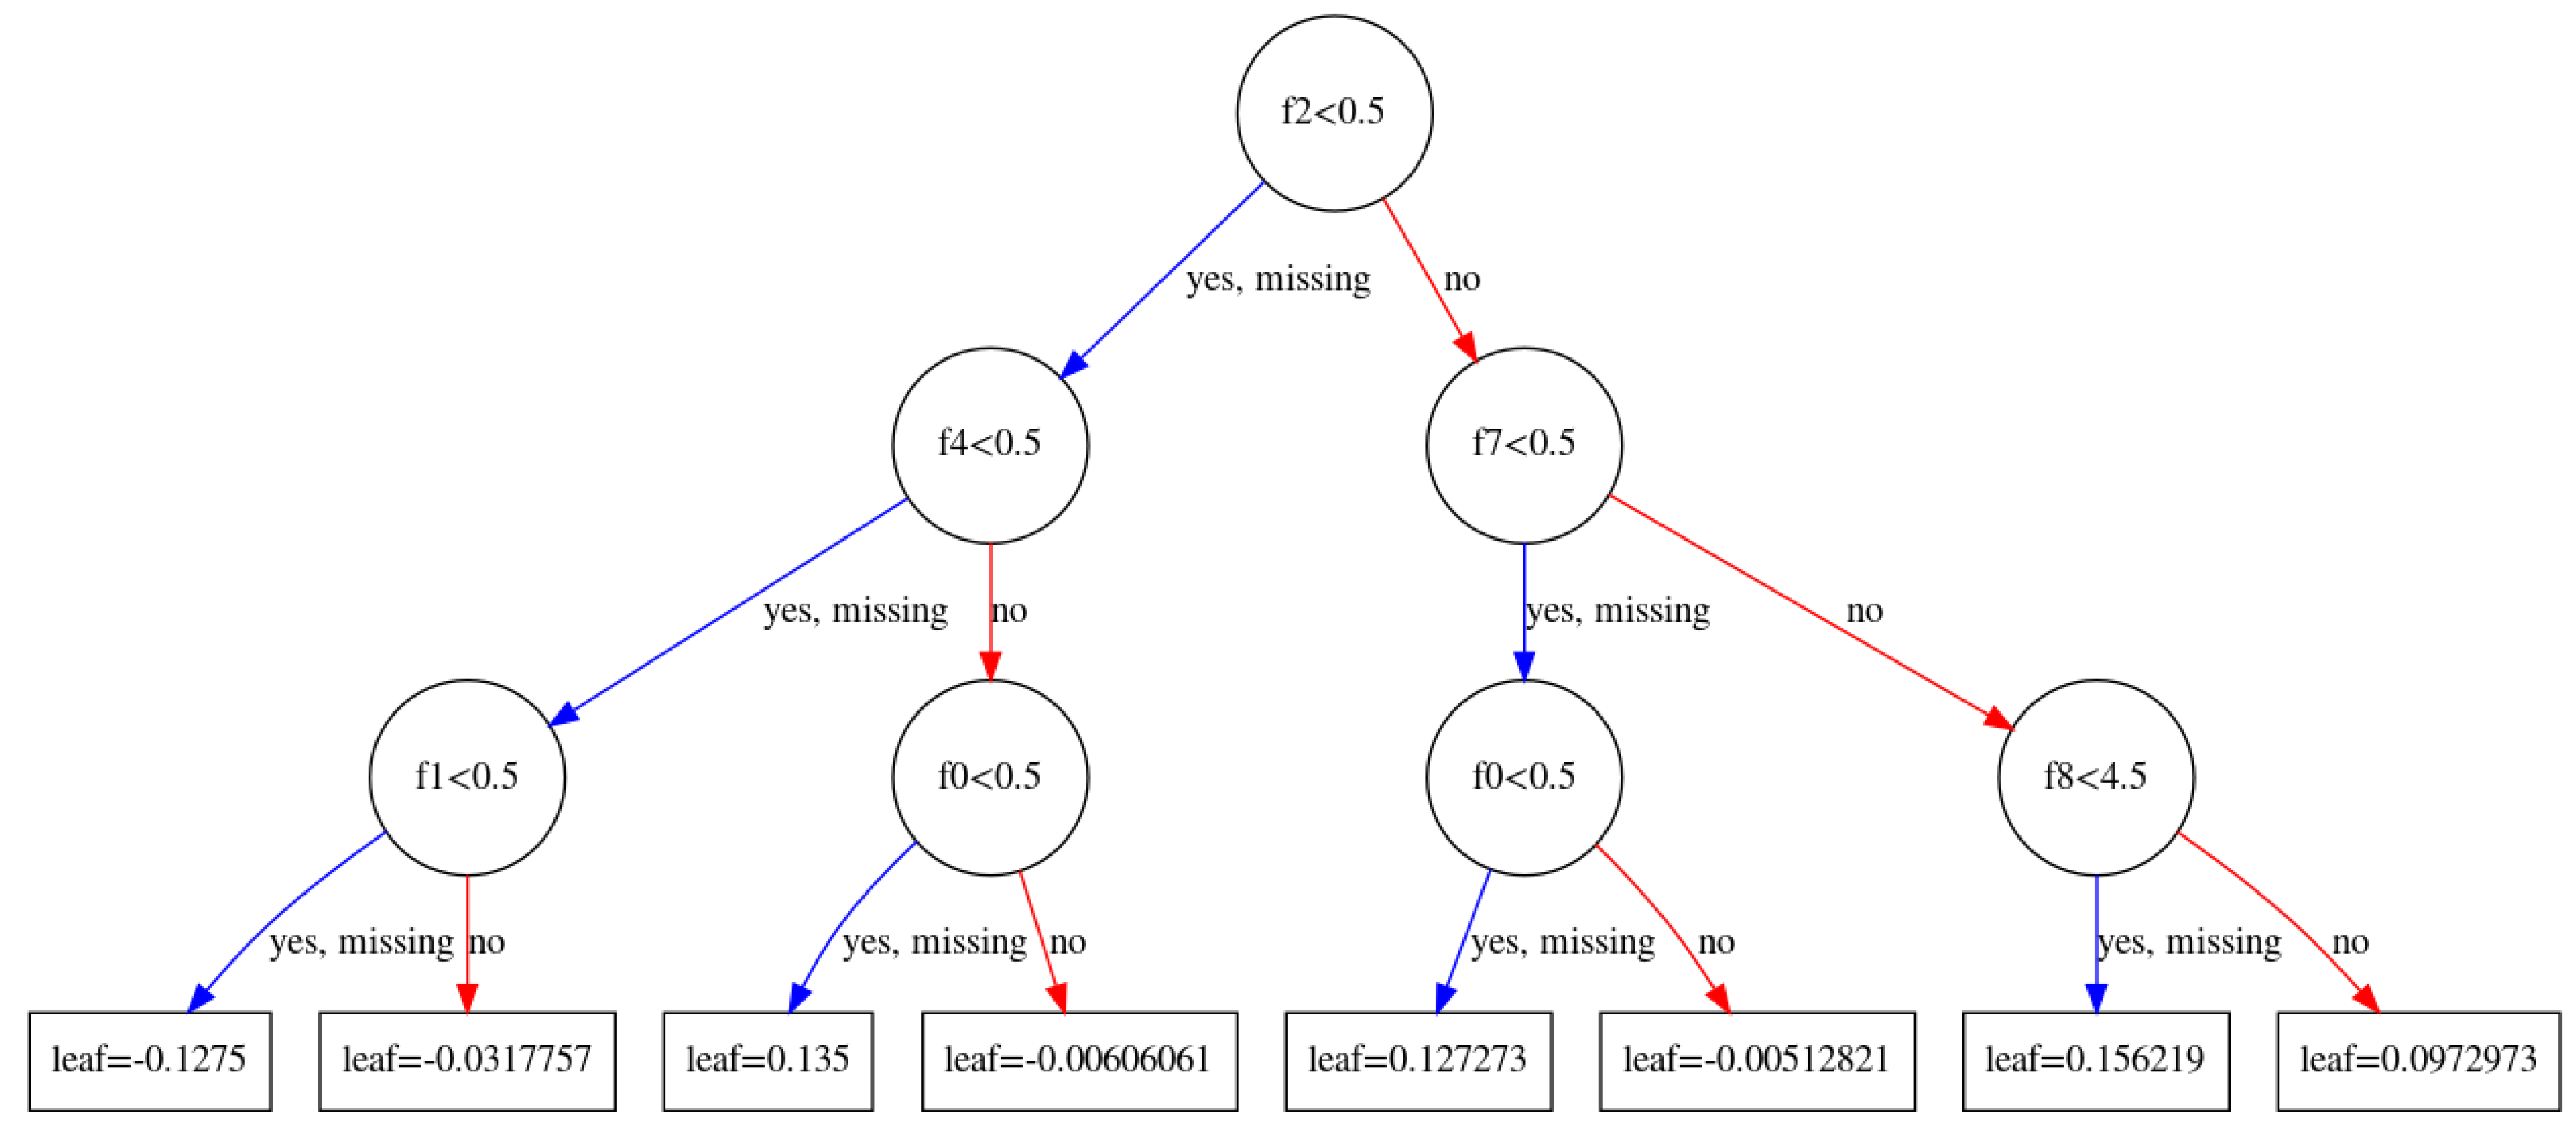

In [41]:
%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 80,50

plot_tree(XGBClassifier)

# Investigate model

Text(0.5,0,'Number of iterations')

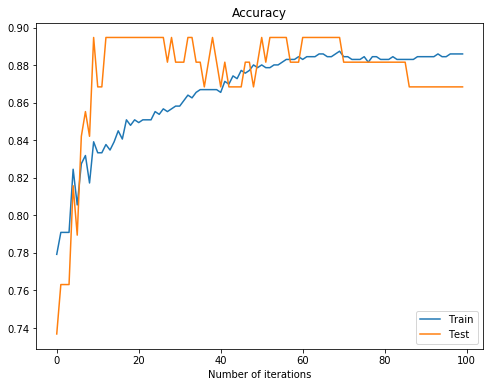

In [42]:
# Plot and display the performance evaluation
eval = model.named_steps['XGBClassifier'].evals_result()
eval_steps = range(len(eval['validation_0']['error']))

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))

ax.plot(eval_steps, [1-x for x in eval['validation_0']['error']], label='Train')
ax.plot(eval_steps, [1-x for x in eval['validation_1']['error']], label='Test')
ax.legend()
ax.set_title('Accuracy')
ax.set_xlabel('Number of iterations')

# Avoid Overfitting By Limiting Number of Trees

In [44]:
# ntree_limits the number of trees in the prediction; defaults to 0 (use all trees)
n_trees = 10
y_pred = model.named_steps['XGBClassifier'].predict(mapper.fit_transform(X_test), ntree_limit= n_trees)

In [45]:
# Check the accuracy of the trained model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: {:.1f}%'.format(accuracy * 100.0))

Accuracy: 89.5%


# Avoid Overfitting By Early Stopping

In [46]:
# Validation error needs to decrease at least every <early_stopping_rounds> round(s) to continue training
# Returns the model from the last iteration (not the best one) 
rounds = 10
steps = [('mapper', mapper),('XGBClassifier', XGBClassifier)]
pipeline = sklearn.pipeline.Pipeline(steps)
model = (pipeline.fit(X_train, y_train, XGBClassifier__eval_metric='error', XGBClassifier__early_stopping_rounds=rounds,
        XGBClassifier__eval_set=[((mapper.fit_transform(X_train), y_train)),(mapper.fit_transform(X_test), y_test)]))

[0]	validation_0-error:0.22076	validation_1-error:0.263158
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.209064	validation_1-error:0.236842
[2]	validation_0-error:0.209064	validation_1-error:0.236842
[3]	validation_0-error:0.209064	validation_1-error:0.236842
[4]	validation_0-error:0.175439	validation_1-error:0.184211
[5]	validation_0-error:0.194444	validation_1-error:0.210526
[6]	validation_0-error:0.172515	validation_1-error:0.157895
[7]	validation_0-error:0.168129	validation_1-error:0.144737
[8]	validation_0-error:0.182749	validation_1-error:0.157895
[9]	validation_0-error:0.160819	validation_1-error:0.105263
[10]	validation_0-error:0.166667	validation_1-error:0.131579
[11]	validation_0-error:0.166667	validation_1-error:0.131579
[12]	validation_0-error:0.162281	validation_1-error:0.105263
[13]	validation_0-error:0.165205	validation_1-error:0.105

In [47]:
# Show best score
print('Best Score: {:.3f}'.format(XGBClassifier.best_score))
print('Best Iteration: {}'.format(XGBClassifier.best_iteration))

Best Score: 0.105
Best Iteration: 9


In [50]:
# Show best number of trees
print('Best Score: {}'.format(XGBClassifier.best_ntree_limit))

Best Score: 10


In [51]:
# Check the accuracy of the trained model with early stopping
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: {:.1f}%.'.format(accuracy * 100.0))

Accuracy: 89.5%.


# Plot Model Performance

In [52]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[23  3]
 [ 5 45]]


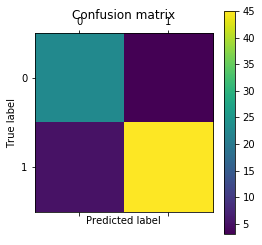

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline  
# Plot the confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

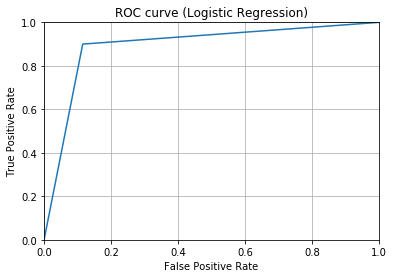

In [54]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [55]:
# Print out AUC, the percentage of the ROC plot that is underneath the curve
print('AUC using XGBoost = {:.2f}'.format(roc_auc_score(y_test, y_pred)))

AUC using XGBoost = 0.89


# Save and Deploy Model

In [56]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2018-07-31 16:01:10,285 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [57]:
# @hidden_cell
wml_credentials = {
    "url": "https://ibm-watson-ml.mybluemix.net",
    "username": "4be82790-d71b-4c9f-ac4e-5af3c4b9c9b1",
    "password": "47571902-8632-47e8-9590-323f49975136",
    "instance_id": "d360e86c-6ddd-45f7-a908-d1ebf83a211d"
}

In [58]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [59]:
model_props = {client.repository.ModelMetaNames.NAME: "XGBoost_model_for_Retail_Churn"}
model_details = client.repository.store_model(model, model_props)

In [60]:
# Display a list of all the models
client.repository.list_models()

------------------------------------  ------------------------------  ------------------------  -----------------
GUID                                  NAME                            CREATED                   FRAMEWORK
c49e1172-f83a-4663-9d74-bb5ee75befe7  XGBoost_model_for_Retail_Churn  2018-07-31T16:01:10.604Z  scikit-learn-0.19
605f191f-98c9-4e55-8c83-ffbe49d36af3  Telco_Churn_SKL_model           2018-07-24T16:12:53.992Z  scikit-learn-0.19
371d41a1-cf31-41a5-8d30-b5a32a4f12ee  RetailChurn                     2018-06-26T21:43:38.280Z  spss-modeler-18.1
------------------------------------  ------------------------------  ------------------------  -----------------


In [61]:
# Extract the uid of the saved model
model_uid = client.repository.get_model_uid(model_details)
print(model_uid)

c49e1172-f83a-4663-9d74-bb5ee75befe7


In [62]:
# Create the deployment
deployment_details = client.deployments.create(model_uid, 'Retail_Churn_with_XGBoost')



#######################################################################################

Synchronous deployment creation for uid: 'c49e1172-f83a-4663-9d74-bb5ee75befe7' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='bc639f91-8694-489b-8517-d7d3dcde368d'
------------------------------------------------------------------------------------------------




In [63]:
# List the deployments
client.deployments.list()

------------------------------------  -------------------------  ------  --------------  ------------------------  -----------------
GUID                                  NAME                       TYPE    STATE           CREATED                   FRAMEWORK
bc639f91-8694-489b-8517-d7d3dcde368d  Retail_Churn_with_XGBoost  online  DEPLOY_SUCCESS  2018-07-31T16:01:14.908Z  scikit-learn-0.19
410a82ca-739b-4077-860a-61454ffe78bf  Predict_Telco_Churn_SKL    online  DEPLOY_SUCCESS  2018-07-24T16:13:19.400Z  scikit-learn-0.19
86a0da67-b85b-4b3f-b035-2f7bdae2d5c2  RetailChurn                online  DEPLOY_SUCCESS  2018-07-12T17:44:13.055Z  spss-modeler-18.1
------------------------------------  -------------------------  ------  --------------  ------------------------  -----------------


In [64]:
# Show deployment details
deployment_details

{'entity': {'deployable_asset': {'created_at': '2018-07-31T16:01:14.863Z',
   'guid': 'c49e1172-f83a-4663-9d74-bb5ee75befe7',
   'name': 'XGBoost_model_for_Retail_Churn',
   'type': 'model',
   'url': 'https://ibm-watson-ml.mybluemix.net/v3/wml_instances/d360e86c-6ddd-45f7-a908-d1ebf83a211d/published_models/c49e1172-f83a-4663-9d74-bb5ee75befe7'},
  'deployed_version': {'guid': 'bd48826c-30cc-4bfd-86a1-7019df88c8e2',
   'url': 'https://ibm-watson-ml.mybluemix.net/v3/ml_assets/models/c49e1172-f83a-4663-9d74-bb5ee75befe7/versions/bd48826c-30cc-4bfd-86a1-7019df88c8e2'},
  'description': 'Description of deployment',
  'model_type': 'scikit-learn-0.19',
  'name': 'Retail_Churn_with_XGBoost',
  'runtime_environment': 'python-3.5',
  'scoring_url': 'https://ibm-watson-ml.mybluemix.net/v3/wml_instances/d360e86c-6ddd-45f7-a908-d1ebf83a211d/deployments/bc639f91-8694-489b-8517-d7d3dcde368d/online',
  'status': 'DEPLOY_SUCCESS',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'type': 'online'},

In [65]:
# Extract endpoint url and display it.
scoring_url = client.deployments.get_scoring_url(deployment_details)
#scoring_url = deployment_details['entity']['scoring_url']
print(scoring_url)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/d360e86c-6ddd-45f7-a908-d1ebf83a211d/deployments/bc639f91-8694-489b-8517-d7d3dcde368d/online


# Score deployment

payload_scoring = {
    "fields": [
    "Retire",
    "Mortgage",
    "LOC",
    "GENDER",
    "CHILDREN",
    "WORKING",
    "HighMonVal",
    "AgeRange",
    "Frequency_score"
    ],
    "values": [ [0, "No", "No", "Female", "No", "Yes", "Yes", "23 to 30", 4] ]
}

In [66]:
# Randomly define values to score from the test dataset
from random import randint
row = randint(0, len(X_test))
values = [int(X_test.iloc[row][0])]
values.extend(X_test.iloc[row,1:-1].tolist())
values.append(int(X_test.iloc[row][8]))
values = [values]
values

[[1, 'No', 'No', 'Female', 'No', 'Yes', 'No', '17 to 22', 4]]

In [67]:
# Prepare scoring payload using these random values
payload_scoring = {"fields":X_test.columns.tolist(), "values": values}
print(payload_scoring)

{'fields': ['Retire', 'Mortgage', 'LOC', 'GENDER', 'CHILDREN', 'WORKING', 'HighMonVal', 'AgeRange', 'Frequency_score'], 'values': [[1, 'No', 'No', 'Female', 'No', 'Yes', 'No', '17 to 22', 4]]}


In [83]:
# Perform prediction and display the result
response_scoring = client.deployments.score(scoring_url, payload_scoring)
print(response_scoring)
print("")
if response_scoring['values'][0][0] == 0:
    print ("Churn Prediction = False")
else:
    print ("Churn Prediction = True")

{'fields': ['prediction', 'probability'], 'values': [[0, [0.870679497718811, 0.12932047247886658]]]}

Churn Prediction = False


In [93]:
# Score same payload again, this time using REST API

import urllib3, requests, json

headers = urllib3.util.make_headers(basic_auth='{}:{}'.format(wml_credentials['username'], wml_credentials['password']))
url = '{}/v2/identity/token'.format(wml_credentials['url'])
response = requests.get(url, headers=headers)
mltoken = json.loads(response.text).get('token')

header_online = {'Content-Type': 'application/json', 'Authorization': "Bearer " + mltoken}
payload_body = json.dumps(payload_scoring)
response_REST = requests.post(scoring_url, data=payload_body, headers=header_online)
print(response_REST.text)
print("")
if response_REST.json()['values'][0][0] == 0:
    print ("Churn Prediction = False")
else:
    print ("Churn Prediction = True")

{"values": [[0, [0.870679497718811, 0.12932047247886658]]], "fields": ["prediction", "probability"]}


Churn Prediction = False


![IBM Logo](http://www-03.ibm.com/press/img/Large_IBM_Logo_TN.jpg)

Rich Tarro  
Anaytics Technical Specialist  
email: rtarro@us.ibm.com
    
July 30, 2018